# Multivariate Linear Regression

In [35]:
#Importing the neccassry packages 
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

Reading the Dataset, the dataset is based on different fish species. The different features like length, height, and width are given to estimate the weight of the fish.
There are $159$ samples in total and $80$ percent of the data is used for training. The $20$ percent of the samples are used for testing the model.

In [2]:
current_path = os.getcwd()#% Finding current directory of the notebook
current_path =os.path.join(current_path,'Fish.csv') # Adding file name at the end of the address
fish_data = pd.read_csv(current_path)# reading csv file given on current_path
fish = fish_data.copy()
print(fish.sample(10))#Displaying 10 random samples from dataset
train, test= train_test_split(fish, test_size=0.2)# Splits data into random test and train samples

       Species  Weight  Length1  Length2  Length3   Height   Width
99       Perch   180.0     23.0     25.0     26.5   6.4395  3.6835
142       Pike  1600.0     56.0     60.0     64.0   9.6000  6.1440
116      Perch   900.0     36.5     39.0     41.4  11.1366  7.4934
148      Smelt     9.7     10.4     11.0     12.0   2.1960  1.3800
33       Bream   975.0     37.4     41.0     45.9  18.6354  6.7473
82       Perch   110.0     19.0     21.0     22.5   5.6925  3.5550
14       Bream   600.0     29.4     32.0     37.2  14.9544  5.1708
25       Bream   725.0     31.8     35.0     40.9  16.3600  6.0532
57   Whitefish   306.0     25.6     28.0     30.8   8.7780  4.6816
10       Bream   475.0     28.4     31.0     36.2  14.2628  5.1042


# Implement the gradient descent algorithm (regression_gradient_descent) from scratch to compute coefficients for multiple regression. [Make sure you add a ‘constant’ column in the feature matrix. Implement functions for output prediction, feature derivative and RSS calculations.]
The linear regression model results in a  best line through the data.
To get the prediction we use weights and feature vector and the prediction as given:
\begin{equation*}
\mathbf{y} = \mathbf{X}\mathbf{w} 
\end{equation*}
 where X transformed feature matrix, it has padded column of $1$ to include the bias term, if there are $n$ features and $m$ number of examples then the new size of $X$ will be $M*N+1$. The Wegith matrix $\mathbf{w}$ is a column vector with rows equal to $n+1$.

In [3]:
def ypred(weights=None, x=None):
    w = weights.reshape(-1,1)  # Reshaping the weights in a row vector
    pred = np.matmul(x,w)
    pred = pred.reshape(x.shape[0])    
    return pred

The RSS in case of multivariate regression and linear regression with one variable is same

In [4]:
def RSS(x=None,y=None,pred=None):    
    rss =  sum(np.square(y - pred))
    return rss

The gradient can be compuited as given below:
\begin{equation*}
\triangledown RSS(\mathbf{w}) = -2 \mathbf{X}^T(\mathbf{y}-\mathbf{X}\mathbf{w}) 
\end{equation*}
 

In [5]:
def derivative(x=None,y=None,pred=None): 
    deri = (np.matmul(x.transpose(), (pred-y))) #-2*transpose(x)(y-x*weight) We can neglect its just a constant
    return deri

The main task is to update weights based on graident calculated. Mathematically it can be simplified as
\begin{equation*}
\mathbf{w}^{(t+1))}=\mathbf{w}^{(t))}-\eta \triangledown RSS(\mathbf{w}^{(t))}) 
\end{equation*}

Where $\eta$ decides the step size to be taken to converg to final solution

In [6]:
def regression_gradient_descent(weights, learning_rate,predtr,xtr, ytr,xts,yts,tolerance):
    #rror = np.zeros(epochs) # loss track 
    errortr =[]
    errorts =[]
    #while tmp < 6:
    #for i in range(0,epochs): # number of training iterations
    
    while 1 == 1:

 
        differential = derivative(x=xtr,y=ytr,pred=predtr) # calculating derivative of 

 
        weights = weights - (learning_rate)*differential#/x.shape[0]

        predtr = ypred(weights=weights, x=xtr) #calculate new prediction

        tmptr = RSS(x=xtr,y=ytr,pred=predtr) # calculate mean Residual squared sum
        
        predts = ypred(weights=weights, x=xts) #calculate new prediction

        tmpts = RSS(x=xts,y=yts,pred=predts) # calculate mean Residual squared sum
        
        errortr.append(tmptr)# calculate mean Residual squared sum
        errorts.append(tmpts)
        
        stop = np.sqrt((differential**2).sum())
        if stop<=tolerance: # checking the tolerance achived or not 
            break

       
    #weights = weights.reshape(1,n+1)
    return weights, errortr,errorts

The below cell basically performs prepreocesing to make the feature vector compatible to be dealt in matrix multiplication


In [7]:
def multivarient_linear_regression_gd(xtr, ytr,xts,yts, learning_rate,tolerance,weights):
    check1 =len(xtr.shape)
    if check1 <2:
        xtr = xtr.reshape(x.shape[0],1)
        xts = xts.reshape(x.shape[0],1)

        
    #n = x.shape[1] # Number of features in one sample 
    
    #weights = np.zeros(n+1) # the number of features are 11 now so does the weights
    
    one_column1 = np.ones((xtr.shape[0],1)) # generating ones for making symetry 
    xtr = np.concatenate((one_column1,xtr), axis = 1)
    
    
    one_column2 = np.ones((xts.shape[0],1)) # generating ones for making symetry 
    xts = np.concatenate((one_column2,xts), axis = 1)
    
     # padding x to add column of ones
    
    predtr = ypred(weights, xtr) # pred the y, only once to use this in future Gradient Descent 
    # returning the optimized parameters by Gradient Descent...
    weight, rsstr,rssts = regression_gradient_descent(weights, learning_rate,predtr,xtr, ytr,xts,yts,tolerance)
    
    return weight, rsstr,rssts
  

# Use the regression_gradient_descent function to compute the model coefficients and test error (RSS) for each of the following cases. Calculate training and test RSS for each step of the gradient descent and then plot it for each of the cases given below.

(1)
features: ‘Length1’\
output: ‘Weight’ 

initial weights: $[-7.5, 1]$ (intercept, Length1 respectively)\
step size (learning rate) = $7e-10$\
tolerance = $1.4e4$

In [8]:
# Train Data
Length1tr =np.array(train.Length1)
xtr = Length1tr.reshape(Length1tr.shape[0],1)
ytr = train.Weight

#Test Data
Length1ts =np.array(test.Length1)
xts = Length1ts.reshape(Length1ts.shape[0],1)
yts = test.Weight

weights=np.array([-7.5,1])
learning_rate = 7e-10
tolerance = 1.4e4
weights1, errortr1,errorts1 = multivarient_linear_regression_gd(xtr, ytr,xts,yts, 
                                                                learning_rate,tolerance,weights)

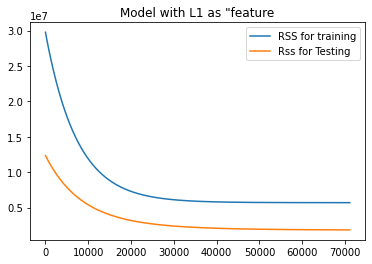

In [9]:
from matplotlib import pyplot as plt
plt.plot(errortr1)
plt.plot(errorts1)
plt.legend(["RSS for training","Rss for Testing"])
plt.title('Model with L1 as "feature')
plt.savefig('Model With L1.png',dpi=100)

(2)
model features = ‘Length1’, ‘Width’\
output = ‘Weight’\
initial weights = $[-8.5, 1, 1]$ (intercept, Length1 and Width respectively)\
step size (learning rate) = $4e-10$\
tolerance = $1.4e4$\

In [10]:
my_cols_x = ['Length1','Width']
my_cols_y = ['Weight']

# Train  Data



xtr =np.array(train[my_cols_x])

ytr = np.array(train[my_cols_y])
ytr = ytr.reshape(ytr.shape[0])

# Test  Data

xts = np.array(test[my_cols_x])
yts = np.array(test[my_cols_y])
yts=yts.reshape(yts.shape[0])





weights=np.array([-8.5,1,1])
learning_rate = 4e-10
tolerance = 1.4e4
weights2, errortr2,errorts2 = multivarient_linear_regression_gd(xtr, ytr,xts,yts, 
                                                                learning_rate,tolerance,weights)

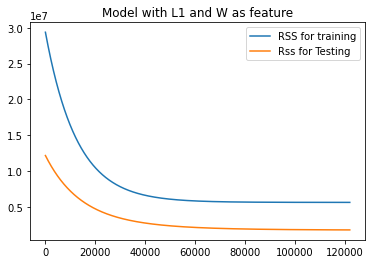

In [11]:
from matplotlib import pyplot as plt
plt.plot(errortr2)

plt.plot(errorts2)
plt.legend(["RSS for training","Rss for Testing"])
plt.title('Model with L1 and W as feature')
plt.savefig('Model With L1 and W.png',dpi=100)

(3)
model features = ‘Length1’, 'Width', 'Height'\
output = ‘Weight’\
initial weights = $[-10, 1, 1,1]$ (intercept, Length1, Width, Height respectively)\
step size (learning rate) = $4e-10$\
tolerance = $1.4e4$

In [12]:
my_cols_x = ['Length1','Width','Height']
my_cols_y = ['Weight']

# Train  Data



xtr =np.array(train[my_cols_x])

ytr = np.array(train[my_cols_y])
ytr = ytr.reshape(ytr.shape[0])

# Test  Data

xts = np.array(test[my_cols_x])
yts = np.array(test[my_cols_y])
yts=yts.reshape(yts.shape[0])

print(xts.shape)

weights=np.array([-10,1,1,1])
learning_rate = 4e-10
tolerance = 1.4e4
weights3, errortr3,errorts3 = multivarient_linear_regression_gd(xtr, ytr,xts,yts, 
                                                                learning_rate,tolerance,weights)

(32, 3)


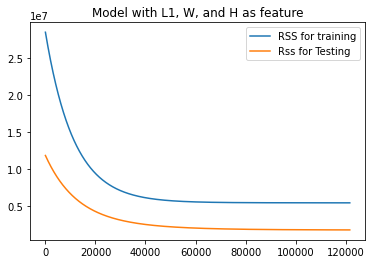

In [13]:
from matplotlib import pyplot as plt
plt.plot(errortr3)

plt.plot(errorts3)
plt.legend(["RSS for training","Rss for Testing"])
plt.title('Model with L1, W, and H as feature')
plt.savefig('Model With L1, W, and H.png',dpi=100)

In [14]:
y1 =[np.array(errortr1).min(),np.array(errortr2).min(),np.array(errortr3).min()]

In [15]:
print(y1)

[5697461.022849876, 5665750.593683864, 5472566.499108578]


In [16]:
print(np.min(y1))

5472566.499108578


In [17]:
y2 = [np.array(errorts1).min(),np.array(errorts2).min(),np.array(errorts3).min()]

In [18]:
print(np.min(y2))

1820914.2258241023


In [19]:
np.argmin(y2)

2

In [20]:
x=['first_case','second_case','third_case']

In [21]:
print('The third case is when we use L1, W, and H as feature')

The third case is when we use L1, W, and H as feature


In [22]:
print('The best perfromance with Train data is achived on ', (x[np.argmin(y1)]),' with RSS value = ',y1[np.argmin(y1)])

The best perfromance with Train data is achived on  third_case  with RSS value =  5472566.499108578


In [23]:
print('The best perfromance with Test data is achived on ', (x[np.argmin(y2)]),' with RSS value = ',y2[np.argmin(y2)])

The best perfromance with Test data is achived on  third_case  with RSS value =  1820914.2258241023


# Built linear regression functions of Scikit Learn library to compute higher polynomial regression models for degrees 2, 3, 4, 5 and 6. Use ‘Lenght1’ as the input feature and ‘Weight’ as output. For each of the model, compute the RSS (on the train and test dataset), and plot the model through the training data.


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import random

In [25]:
# Train Data
Length1tr =np.array(train.Length1)
xtr = Length1tr.reshape(Length1tr.shape[0],1)
ytr = train.Weight

#Test Data
Length1ts =np.array(test.Length1)
xts = Length1ts.reshape(Length1ts.shape[0],1)
yts = test.Weight

In [26]:
def polyregression(degree =None, Xtrain =None,Ytrain = None, Xtest =None, Ytest =None):
    degree=degree
    model=make_pipeline(PolynomialFeatures(degree),LinearRegression())#combining two in pipeline
                                                    # (1) # transforming feature based on degree of polynomial
                                                    # (2) #initializing linear regresion model
    model.fit(xtr,ytr) # training the model
    Y_predtr = model.predict(xtr) # predictions on training data
    Y_predts = model.predict(xts) # predictions on testing data
    
    rsstr = ((ytr - Y_predtr) ** 2).sum() # RSS for Training Data
    rssts = ((yts - Y_predts) ** 2).sum() # RSS for Testing Data
    
    return model, rsstr, rssts,Y_predtr


In [27]:
rsstr =np.zeros(5)
rssts =np.zeros(5)
Y_predtr = np.zeros((ytr.shape[0],5))
model2,rsstr[0],rssts[0],Y_predtr[:,0] = polyregression(degree =2, 
                                                       Xtrain =xtr,Ytrain = ytr, Xtest =xts, Ytest =yts)
model3,rsstr[1],rssts[1],Y_predtr[:,1] = polyregression(degree =3, 
                                                        Xtrain =xtr,Ytrain = ytr, Xtest =xts, Ytest =yts)
model4,rsstr[2],rssts[2],Y_predtr[:,2] = polyregression(degree =4, 
                                                        Xtrain =xtr,Ytrain = ytr, Xtest =xts, Ytest =yts)
model5,rsstr[3],rssts[3],Y_predtr[:,3] = polyregression(degree =5, 
                                                        Xtrain =xtr,Ytrain = ytr, Xtest =xts, Ytest =yts)
model6,rsstr[4],rssts[4],Y_predtr[:,4]= polyregression(degree =6, 
                                                       Xtrain =xtr,Ytrain = ytr, Xtest =xts, Ytest =yts)


In [28]:
print('RSS on Train and Test Data for degree of Polynomials')

for i in range(rsstr.shape[0]):
    print('Degree of Polynomial:   '+str(i+2))
    print()
    print('Train Data:   '+str(rsstr[i])+ '  &  Test Data:   '+str(rssts[i]))
    print()


RSS on Train and Test Data for degree of Polynomials
Degree of Polynomial:   2

Train Data:   2677876.930357304  &  Test Data:   475955.76295956894

Degree of Polynomial:   3

Train Data:   2639808.4015903794  &  Test Data:   421972.8009274961

Degree of Polynomial:   4

Train Data:   2244726.561125096  &  Test Data:   606729.9479228448

Degree of Polynomial:   5

Train Data:   2081222.8305994906  &  Test Data:   1224285.5252365714

Degree of Polynomial:   6

Train Data:   2036416.3555068446  &  Test Data:   663000.7730196272



In [29]:
np.argmin(rssts)

1

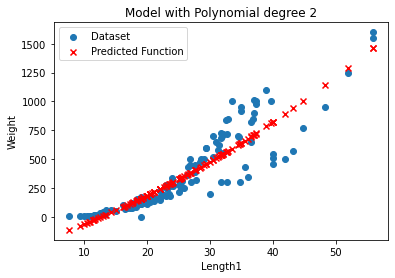

In [30]:
from matplotlib import pyplot as plt
degree = 2
plt.scatter(train['Length1'],train['Weight'])
plt.scatter(train['Length1'],Y_predtr[:,degree-2],marker='x',color='red')
plt.legend(["Dataset","Predicted Function"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Model with Polynomial degree '+str(degree))
plt.savefig('Model With degree'+str(degree)+'.png',dpi=100)

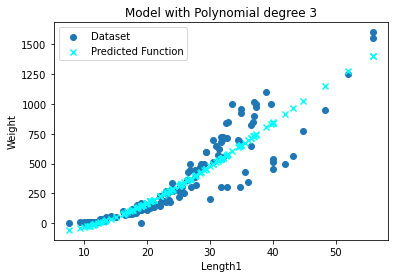

In [31]:
from matplotlib import pyplot as plt
degree = 3

plt.scatter(train['Length1'],train['Weight'])
plt.scatter(train['Length1'],Y_predtr[:,degree-2],marker='x',color='cyan')
plt.legend(["Dataset","Predicted Function"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Model with Polynomial degree '+str(degree))
plt.savefig('Model With degree'+str(degree)+'.png',dpi=100)

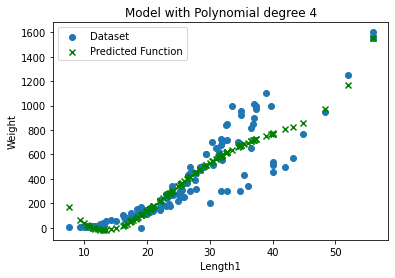

In [32]:
from matplotlib import pyplot as plt
degree = 4

plt.scatter(train['Length1'],train['Weight'])
plt.scatter(train['Length1'],Y_predtr[:,degree-2],marker='x',color='green')
plt.legend(["Dataset","Predicted Function"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Model with Polynomial degree '+str(degree))
plt.savefig('Model With degree'+str(degree)+'.png',dpi=100)

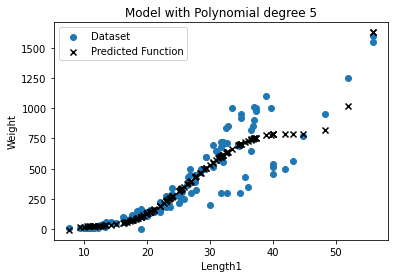

In [33]:
from matplotlib import pyplot as plt
degree = 5

plt.scatter(train['Length1'],train['Weight'])
plt.scatter(train['Length1'],Y_predtr[:,degree-2],marker='x',color='black')
plt.legend(["Dataset","Predicted Function"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Model with Polynomial degree '+str(degree))
plt.savefig('Model With degree'+str(degree)+'.png',dpi=100)

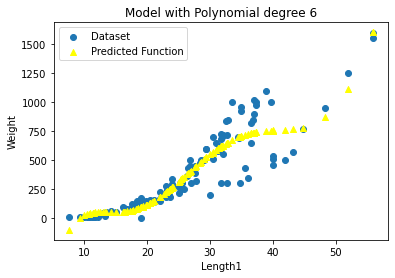

In [34]:
from matplotlib import pyplot as plt
degree = 6

plt.scatter(train['Length1'],train['Weight'])
plt.scatter(train['Length1'],Y_predtr[:,degree-2],marker='^',color='yellow')
plt.legend(["Dataset","Predicted Function"])
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Model with Polynomial degree '+str(degree))
plt.savefig('Model With degree'+str(degree)+'.png',dpi=100)